In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
#%% definitions

def synthetic_signal(t):
    #y = np.exp(-1.5 * t) * np.cos(40 * t) # simpler example
    y = 0.5 * np.exp(-10 * t) * np.sin(20 * 2 * np.pi * t + 0.1) + 1 * np.exp(-50 * t) * np.sin(250.0 * 2.0 * np.pi * t)
    return y

def laplace_function(function, t, sigma):
    y_exp = function * np.exp(-sigma * t)
    y_exp_fft = np.fft.rfft(y_exp)
    real = y_exp_fft.real
    imaginary = y_exp_fft.imag
    return real, imaginary
#%% look at result with a fixed sigma value to see if it makes sense.
t = np.linspace(0, 0.5, num=int(1e3), endpoint=False)
f = synthetic_signal(t)


ls = [ [0]*100 for i in range(100)]
for ix_sigma in np.arange(1,100):
    sigma = 100*(ix_sigma-50)/50
    for ix_omega in np.arange(1,100):
        omega = 100*(ix_omega-50)/50
        s = sigma + 1j*omega
        ls[ix_sigma][ix_omega] = np.sum(np.multiply(f, np.exp(-s*t)))
        

ls_min = np.min(np.min(np.abs(ls)))
ls_max = np.max(np.max(np.abs(ls)))

ls_norm = np.abs((ls - ls_min)/(ls_max-ls_min))
# l_real, l_imaginary = laplace_function(f, t, sigma=-1.5)

# print('y_exp_fft =', y_exp_fft)

# plt.plot(l_imaginary, 'k.-')
# plt.plot(l_real, 'r.-')
# plt.plot(l_real, l_imaginary, 'b.')


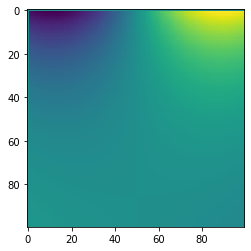

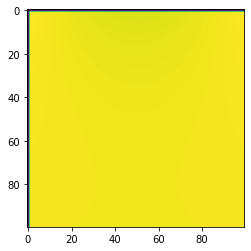

[0.0, 9.325235854232112]


In [144]:
import numpy as np 
import matplotlib.pyplot as plt

plt.imshow(np.imag(ls), interpolation='none')
plt.show()
plt.imshow(np.real(ls))
plt.show()

print([ls_min, ls_max])
# plt.plot(ls_norm)